# Analyse des Optimizers

Le rôle de l’optimizer est de définir comment évolue (apprend) une IA pour s’adapter aux données d’entraînement. Par défaut, on utilise souvent la Descente de Gradient Stochastique (SGD)

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange
from matplotlib import cm
from matplotlib.ticker import LinearLocator

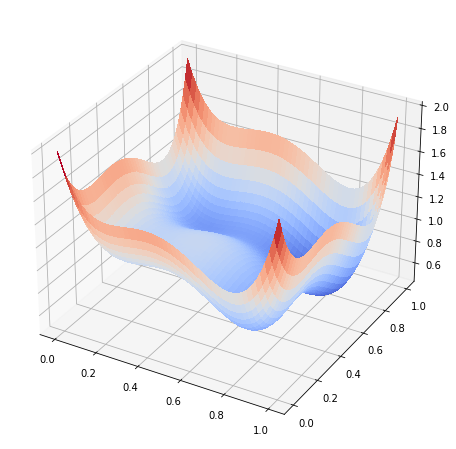

In [24]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(8, 8))

def func(X, Y):
    def aux(T):
        return 21.3*T**4 - 40*T**3 + 24.67*T**2 - 6*T + 1
    return aux(X) + aux(Y)

# Make data.
X = np.arange(0, 1, 0.001)
Y = np.arange(0, 1, 0.001)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = func(X, Y)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
"""
# Customize the z axis.
# ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
"""
plt.show()

Nous allons ici créer un Neuronne Linéaire sans fonction d'activation, et nous allons l'entrainer à multiplier par la valeur cible.

In [25]:
class Neuronne2Lineaire:
    def __init__(self, pseudo_alea=True, lr=0.8, cible=(0.5, 0.5)):
        if pseudo_alea:
            np.random.seed(2)
        self.w = np.random.random((2, 1))
        self.lr = np.array([lr, lr]) # le learning rate
        self.liste_w = [] # l'historique des poids
        self.liste_e = [] # l'historique des erreurs
        self.cible = np.array(cible) # le poids ciblé par l'entrainement
        
    def calcul(self, x):
        return np.dot(x, self.w) # prédiction du résultat
    
    @staticmethod
    def erreur(y_, y): # y_ la sortie calculé, y la sortie souhaitée
        return (y - y_) ** 2
    
    @staticmethod
    def d_erreur(x, y_, y): # y_ la sortie calculé, y la sortie souhaitée
        return (2*(y_-y) * 1 * x).mean() # Calcul de la mise à niveau du poids
    
    def validation(self):
        e = self.erreur(self.w, self.cible)
        self.liste_w.append(self.w)
        self.liste_e.append(e)
        
    def calcul_dw(self, x, y):
        if type(x) == int:
            x, y = np.array([x]), np.array([y])
        y_ = self.calcul(x)
        dw = self.d_erreur(x, y_, y)
        return dw
    
    def retropropagation(self, x, y):
        dw = self.calcul_dw(x, y)
        self.w -= self.lr * dw # Mise à jour du poids
    
    def plot(self, ax=plt, title="", mini=None, maxi=None):
        cible = self.cible
        if mini is None:
            mini = min(self.liste_w)
            maxi = max(self.liste_w)
            mean = max(abs(mini-cible), abs(maxi-cible))/2
            x = np.linspace(min(mini-mean, cible-mean), 
                            max(maxi+mean, cible+mean), 
                            1_000)
        else:
            x = np.linspace(min(mini, min(self.liste_w)), 
                            max(maxi, max(self.liste_w)), 
                            1_000)
        
        y = self.erreur(x, self.cible) # calcul de la courbe d'erreur
        
        # ax.figure(figsize=(12, 6))
        ax.plot(x, y, label="Courbe d'erreur")
        ax.plot(self.liste_w, self.liste_e, 'o-', lw=3, label="Apprentissage")
        ax.set_title(title)
        ax.grid()
        ax.legend()

# Descente de Gradient Stochastique (SGD)

On remarquera que pour un grand learning rate, l'apprentissage oscille énormément autour de la valeure recherchée.  
Tandis que pour un petit learning rate, celui-ci descent assez lentement.

0.7317041265138073
0.7317041265138073


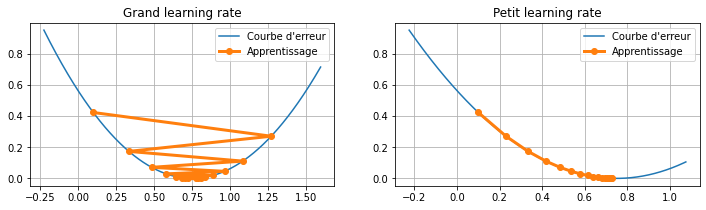

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(12, 3))

# Grand learning rate
reseau = NeuronneLineaire(lr=0.9, cible=0.75)
reseau.w = 0.1
for i in range(16):
    reseau.validation()
    reseau.retropropagation(1, 0.75)
print(reseau.calcul(1))
reseau.plot(ax=axs[0], title="Grand learning rate")

# Petit learning rate
reseau = NeuronneLineaire(lr=0.1, cible=0.75)
reseau.w = 0.1
for i in range(16):
    reseau.validation()
    reseau.retropropagation(1, 0.75)
print(reseau.calcul(1))
reseau.plot(ax=axs[1], title="Petit learning rate")

#### Lagrange loss

       4      3         2
21.33 x - 40 x + 24.67 x - 6 x + 1
[0.78182458 0.3990627  0.22536273]
0.7818245754575138


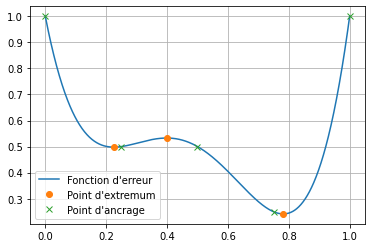

In [3]:
poly = lagrange(
    [0, 0.25, 0.5, 0.75, 1], 
    [1, 0.5, 0.5, 0.25, 1]
)

x = np.linspace(0, 1, 1000)
y = poly(x)
plt.plot(x, y, label="Fonction d'erreur")
plt.grid()

deriv = poly.deriv()
x_extr = deriv.r
y_extr = poly(x_extr)
plt.plot(x_extr, y_extr, 'o', label="Point d'extremum")
plt.plot(
    [0, 0.25, 0.5, 0.75, 1], 
    [1, 0.5, 0.5, 0.25, 1],
    "x",
    label="Point d'ancrage"
)
plt.legend()

print(poly)
print(x_extr)
cible = x_extr[0]
print(cible)

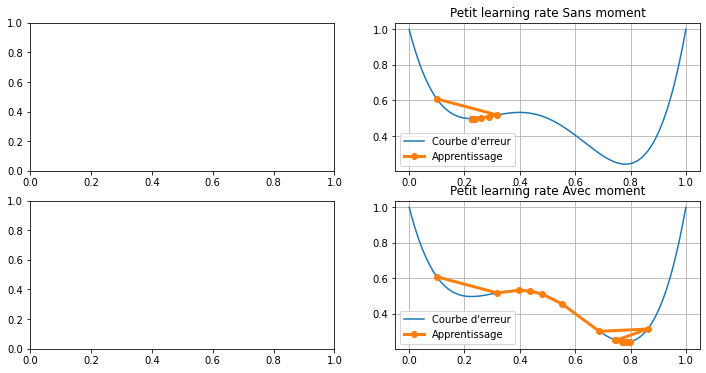

In [11]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

def erreur(y_, y):
    e  = poly(y_) # calcul de l'erreur 
    return e

def d_erreur(x, y_, y):
    return (deriv(y_) * 1 * x).mean() # Calcul de la mise à niveau du poids

# Grand learning rate
""" Ne fonctionne pas pour un grand learning rate dû à la grande dérivée
"""

# Petit learning rate
reseau2 = NeuronneLineaire(lr=0.1, cible=cible)
reseau2.w = 0.1
reseau2.erreur = erreur
reseau2.d_erreur = d_erreur

# Entrainement
for i in range(16):
    reseau2.validation()
    reseau2.retropropagation(1, cible)
reseau2.plot(ax=axs[0, 1], title="Petit learning rate Sans moment", mini=0, maxi=1)

# Petit Learning rate
reseau = NeuronneLineaire(lr=0.1, cible=cible)
reseau.w = 0.1
gamma = 0.5
dw_moment_ = 0
reseau.erreur = erreur
reseau.d_erreur = d_erreur
for i in range(16):
    reseau.validation()
    dw = reseau.calcul_dw(1, cible)
    dw_moment = gamma * dw_moment_ + reseau.lr * dw
    reseau.w -= dw_moment
    dw_moment_ = dw_moment
reseau.plot(ax=axs[1, 1], title="Petit learning rate Avec moment", mini=0, maxi=1)